## Comparison of the similarity level between matrices

Below, I will show how to compair the similarity level between matrices using rotation oerations $Rx$ and *SWAP Test*. The technique consists in generating a model that is compared with other input matrices. The measurement is made only in the test qubit and the degree of similarity between the matrices is observed in the probability distribution by the number of times the state $|0\rangle$ is measured. The result is a mapping of the probability in the *Bloch Sphere*.

In [53]:
import qiskit
from qiskit import *
from qiskit.visualization import *
import numpy as np
import pandas as pd

In [54]:
'''
Creating a model which will be mapped in a quantum circuit through rotation operations, where:

0 -> Rx(pi)
1 -> Rx(pi/2)

If you are interested in tasks like image classification, you can change this simple matrix by 
a pixel matrix and increase the number of rotation types for different colors

'''
T = np.matrix([[1,1,1],[0,1,0],[0,1,0],[0,1,0]])
T              

matrix([[1, 1, 1],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]])

In [55]:
# matrix T to list T_list in order to better manipulation
list_T = []
for j in range(4):    
    for i in range(3):
        list_T.append(T[j,i])


model=QuantumRegister(12, 'model')
inputt=QuantumRegister(12, 'input')
test = QuantumRegister(1, 'test')
c0=ClassicalRegister(1)

ml = QuantumCircuit(model,inputt,test,c0)

def swap_test():
    st = QuantumCircuit(model,inputt,test)
    st.barrier()
    st.h(test)
    for i in range(len(list_T)):
        st.cswap(test,model[i],inputt[i])
    
    st.h(test)
    return st

def compair():
    comp=QuantumCircuit(model,inputt,test)

    for i in range(len(comp_1)):
        if(comp_1[i]==1):
            comp.rx(np.pi/2, inputt[i])
        elif(comp_1[i]==0):
            comp.rx(np.pi, inputt[i])
            
    return comp
  
    
list_T

[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]

In [56]:
#TRAINING

list_model = []
   
for i in range(len(list_T)):
    if(list_T[i]==1):
        ml.rx(np.pi/2, model[i])
    elif(list_T[i]==0):
        ml.rx(np.pi, model[i])

#Model to compair
comp_1 = list_T
comp_1[0] = 0
comp_1[1] = 0

ml = ml.compose(compair())

#swap test
ml = ml.compose(swap_test())


ml.measure(test,c0)

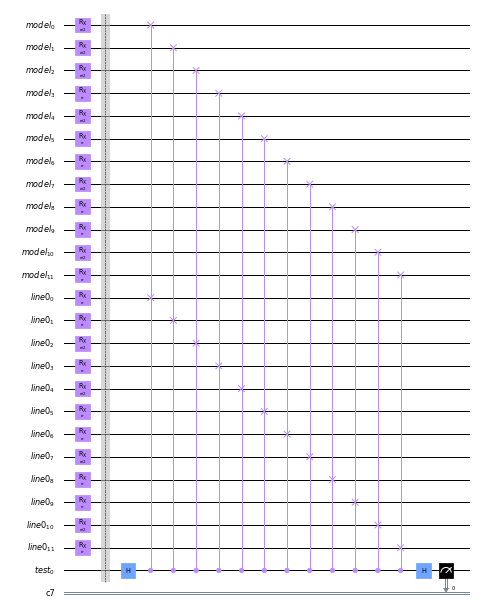

In [61]:


ml.draw('mpl',fold=-1, scale = 0.5)

In [58]:
simulator = Aer.get_backend('qasm_simulator')

In [59]:
counts = execute(ml, backend=simulator, shots=10000).result().get_counts(ml)

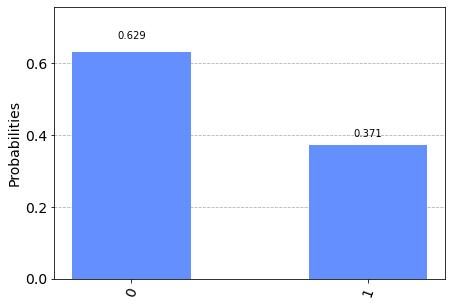

In [60]:
plot_histogram(counts)

In [ ]:
'''
with matrix differing by two elements, the |0> state was measured 62,9% of the times.
Of curse, if input matrix is equal to model matrix, |0> state should be measured roughly 100% of the times.
'''